# PCA of Iris Data

### Principal Component Analysis or PCA is a dimensionality reduction method is used to reduce the dimensionality of large size datasets. In other words, we can reduce the number of variables while keeping the information intact.

### IRIS Dataset
### The Iris dataset represents 3 kind of Iris flowers (Setosa, Versicolour and Virginica) with 4 attributes: sepal length, sepal width, petal length and petal width.

In [23]:
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

url="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
#load dataset into Pandas dataframe
df=pd.read_csv(url, names=['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])

In [24]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
from sklearn.preprocessing import StandardScaler
features=['sepal length', 'sepal width', 'petal length', 'petal width']
#separating out the features
x=df.loc[:, features].values
#separating out the target
y=df.loc[:,['target']].values

In [26]:
#Standardizing the features
x=StandardScaler().fit_transform(x)
xdf=pd.DataFrame(x)
xdf.columns=features
xdf.head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


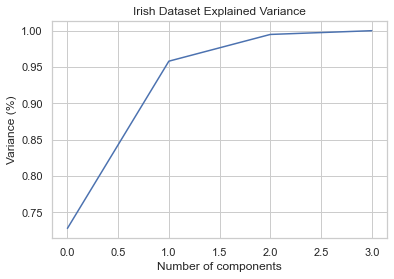

In [27]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
#Fitting the PCA algo with our data
pca=PCA().fit(xdf)
#Plotting the cumulative summatiuon of explained variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
sns.set(style="whitegrid")
plt.xlabel('Number of components')
plt.ylabel('Variance (%)')   # for each component
plt.title('Irish Dataset Explained Variance')
plt.show()

In [28]:
pca=PCA(n_components=2)
principalComponents=pca.fit_transform(x)
principalDf=pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2'])
principalDf.head()

,Principal Component 1,Principal Component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [29]:
#Concatenating DataFrame along axis=1. finalDF is the final dataframe
finalDf=pd.concat([principalDf, df[['target']]], axis=1)
finalDf.head()

,Principal Component 1,Principal Component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


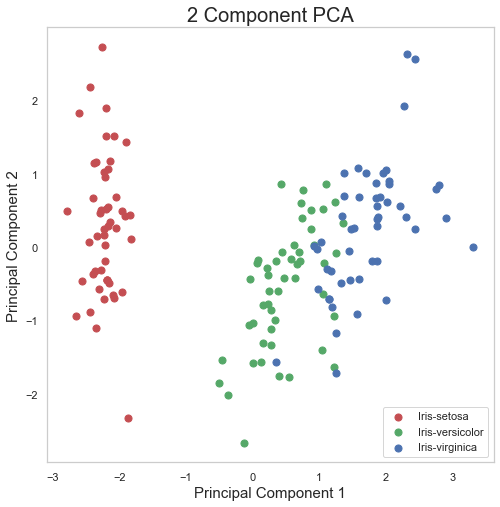

In [30]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 Component PCA', fontsize=20)
targets=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors=['r','g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep=finalDf['target']==target
    ax.scatter(finalDf.loc[indicesToKeep, 'Principal Component 1']
              ,finalDf.loc[indicesToKeep, 'Principal Component 2']
              ,c=color
              ,s=50)
ax.legend(targets)
ax.grid()

In [31]:
#Explained variance
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

### Together the 2 components contain 95.80%of the information

In [32]:
pca.fit(xdf)

PCA(n_components=2)

In [33]:
newdata=pca.transform(xdf)

### Applying Logistic Regression to original dataset

In [34]:
from sklearn.linear_model import LogisticRegression
logisticRegr=LogisticRegression(solver='lbfgs')
logisticRegr.fit(principalDf, df[['target']])

C:\Users\ADMIN\anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [35]:
#Predict for target
logisticRegr.score(principalDf, df[['target']])

0.9333333333333333